In [6]:
import easyocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

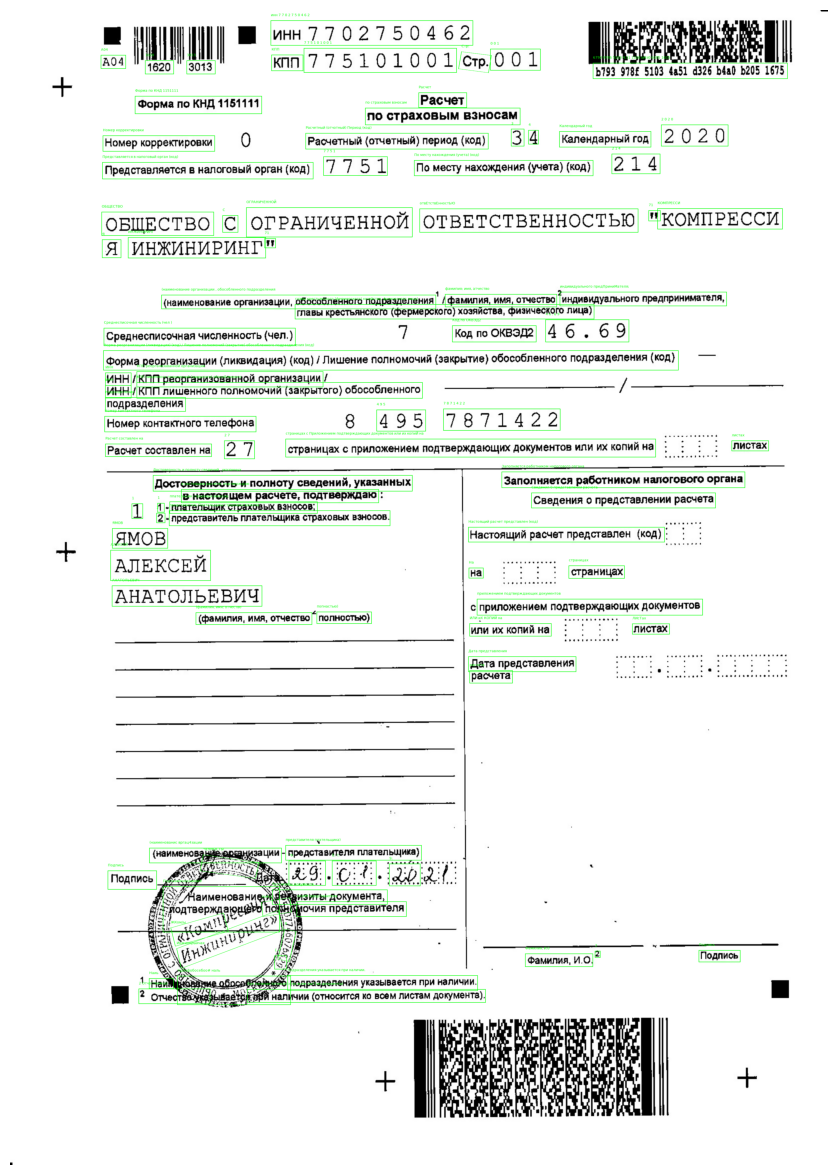

In [11]:
def draw_bounding_boxes(image_path, output_path, scale_factor=2):
    # Initialize the EasyOCR reader for Russian language
    reader = easyocr.Reader(['ru'])

    # Read the image
    image = cv2.imread(image_path)

    # Resize the image
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    resized_image = cv2.resize(image, (width, height))

    # Perform OCR on the resized image
    results = reader.readtext(resized_image)

    # Convert OpenCV image (BGR) to PIL image (RGB)
    pil_image = Image.fromarray(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)
    
    font_size  = 14
    # Load the default PIL font
    font = ImageFont.truetype("DejaVuSans.ttf", font_size)

    # Iterate over each detected text and draw the bounding box and text
    for (bbox, text, prob) in results:
        # Unpack the bounding box coordinates
        (top_left, top_right, bottom_right, bottom_left) = bbox
        
        # Convert coordinates to integers
        top_left = tuple(map(int, top_left))
        top_right = tuple(map(int, top_right))
        bottom_right = tuple(map(int, bottom_right))
        bottom_left = tuple(map(int, bottom_left))
        
        # Draw the bounding box
        draw.line([top_left, top_right, bottom_right, bottom_left, top_left], fill=(0, 255, 0), width=2)
        
        # Put the OCR text on the image
        draw.text((top_left[0], top_left[1] - 30), text, fill=(0, 255, 0), font=font)

    # Convert PIL image back to OpenCV image
    final_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

    # Save the result image
    cv2.imwrite(output_path, final_image)
    
    # Convert BGR image to RGB for displaying with matplotlib
    final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.figure(figsize=(15, 15))
    plt.imshow(final_image_rgb)
    plt.axis('off')
    plt.show()


# Provide the path to your input image and the output image
image_path = 'img.jpg'
output_path = 'output_image_with_boxes.jpg'
# font_path = 'path_to_your_font.ttf'  # Ensure you have a TTF font file that supports Russian characters

# Draw bounding boxes on the image and save the result
draw_bounding_boxes(image_path, output_path)